In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline


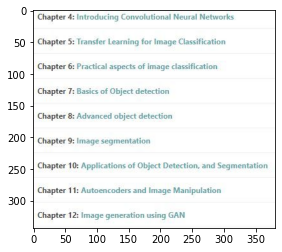

In [9]:
img = cv2.imread("chars.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

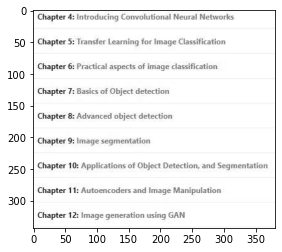

In [10]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray")

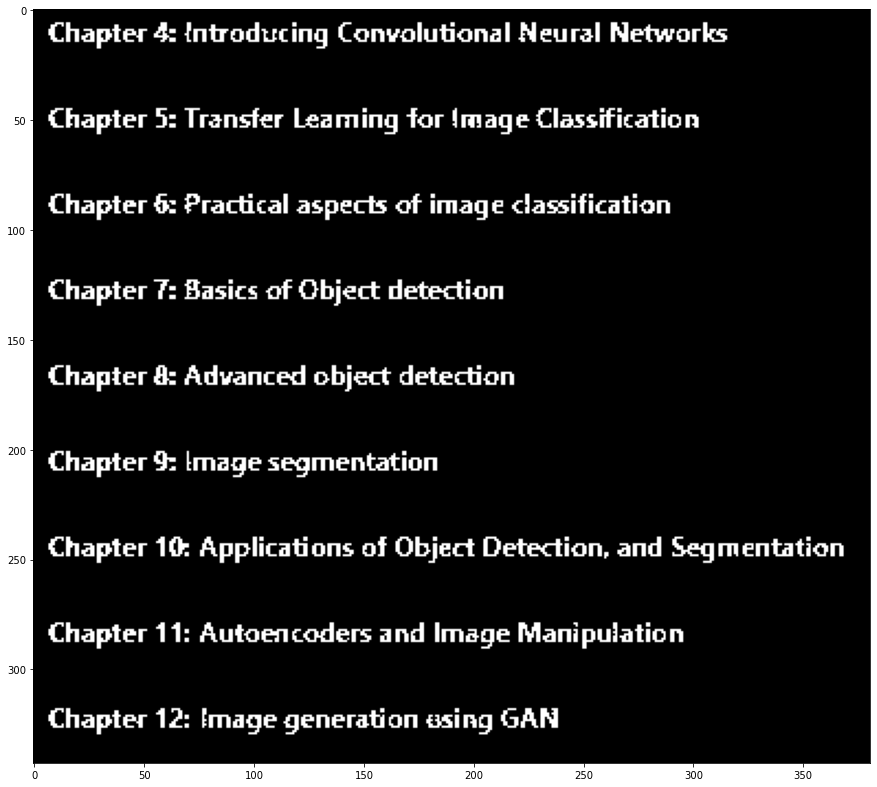

In [20]:
img_gray_bin = np.uint8(img_gray < 200) * 255 # 这里还完成了反色
plt.figure(figsize=(15, 15))
plt.imshow(img_gray_bin, cmap="gray")

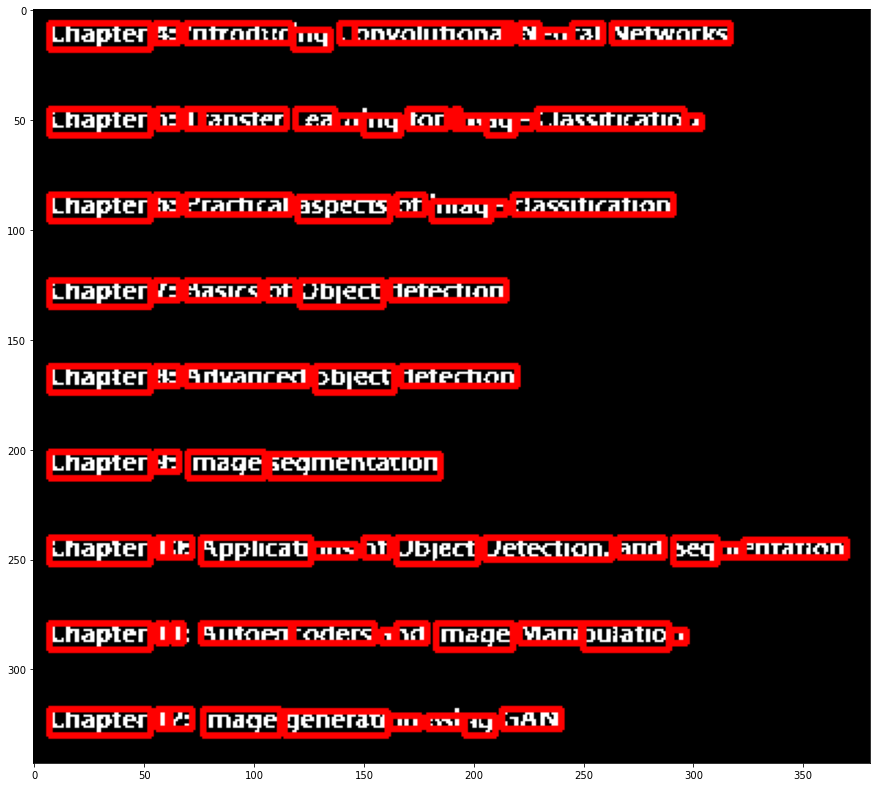

In [24]:
# dilation
img_gray_dilated = cv2.dilate(img_gray_bin, np.ones((1, 2), np.uint8), iterations=1)

def draw_bbox(img_bin, img_bin_dilated):
    contours, heirachy = cv2.findContours(img_bin_dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    thres1 = np.stack([img_bin]*3, axis=2)
    thres2 = np.zeros((thres1.shape[0], thres1.shape[1]))

    for cnt in contours:
        if cv2.contourArea(cnt) > 0:
            [x, y, w, h] = cv2.boundingRect(cnt)
            if (h > 5) and (h < 100):
                thres2[y:(y+h), x:(x+w)] = thres1[y:(y+h), x:(x+w), 0].copy()
                cv2.rectangle(thres1, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    return thres1, thres2

thres1, thres2 = draw_bbox(img_gray_bin, img_gray_dilated)
plt.figure(figsize=(15, 15))
plt.imshow(thres1)